In [24]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["font.size"]=12
plt.rcParams["figure.figsize"]=(14,4)

In [25]:
df=pd.read_csv('고령인구65이상.csv')
df

,KOSIS 100대 지표,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,지표,2011,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
1,고령인구비율(65세이상) (%),11,11.5,11.9,12.4,12.8,13.2,13.8,14.3,14.9,15.7


In [26]:
df.columns=df.iloc[0]
df

,지표,2011,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,지표,2011,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
1,고령인구비율(65세이상) (%),11,11.5,11.9,12.4,12.8,13.2,13.8,14.3,14.9,15.7


In [27]:
df=df.drop(0,0)
df

,지표,2011,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
1,고령인구비율(65세이상) (%),11,11.5,11.9,12.4,12.8,13.2,13.8,14.3,14.9,15.7


In [28]:
pf=pd.melt(df,id_vars='지표',var_name='년도',value_name='비율')
pf

,지표,년도,비율
0,고령인구비율(65세이상) (%),2011,11.0
1,고령인구비율(65세이상) (%),2012,11.5
2,고령인구비율(65세이상) (%),2013,11.9
3,고령인구비율(65세이상) (%),2014,12.4
4,고령인구비율(65세이상) (%),2015,12.8
5,고령인구비율(65세이상) (%),2016,13.2
6,고령인구비율(65세이상) (%),2017,13.8
7,고령인구비율(65세이상) (%),2018,14.3
8,고령인구비율(65세이상) (%),2019,14.9
9,고령인구비율(65세이상) (%),2020,15.7


Text(0.5, 0.98, 'more than 65age ratio')

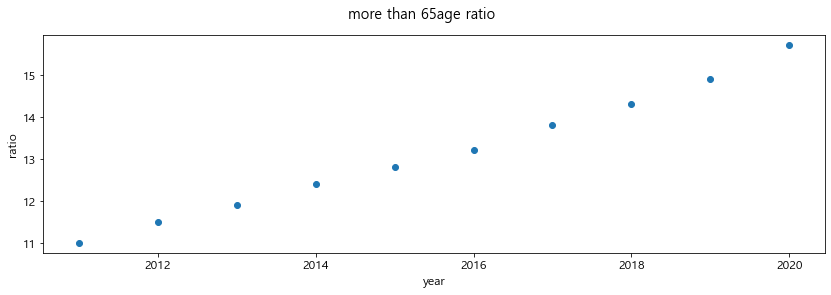

In [29]:
fig=plt.figure()
axes=fig.add_subplot(1,1,1)

axes.plot(pf['년도'],pf['비율'],'o')
axes.set_xlabel('year')
axes.set_ylabel('ratio')
fig.suptitle('more than 65age ratio')

--------------------------------------------------------------------------------------------------------------------------

In [30]:
old_people_2010=pd.read_csv('2010old.csv',sep='\t')
old_people_2010

,기간,자치구,동,전체인구,전체인구.1,전체인구.2,65세이상 인구,65세이상 인구.1,65세이상 인구.2
0,기간,자치구,동,전체인구,전체인구,전체인구,내국인,내국인,내국인
1,기간,자치구,동,계,남자,여자,계,남자,여자
2,2010,합계,합계,"10,575,447","5,236,742","5,338,705","1,002,770","433,322","569,448"
3,2010,종로구,소계,"179,362","89,252","90,110","22,311","9,724","12,587"
4,2010,종로구,사직동,"10,668","5,073","5,595","1,524",645,879
...,...,...,...,...,...,...,...,...,...
447,2010,강동구,둔촌1동,"20,759","10,717","10,042","1,107",408,699
448,2010,강동구,둔촌2동,"30,132","14,932","15,200","2,399",983,"1,416"
449,2010,강동구,암사1동,"40,183","20,150","20,033","3,387","1,469","1,918"
450,2010,강동구,천호2동,"39,458","19,860","19,598","3,713","1,646","2,067"


In [31]:
old_people=glob.glob('*old.csv')
print(old_people)

['2010old.csv', '2011old.csv', '2012old.csv', '2013old.csv', '2014old.csv', '2015old.csv', '2016old.csv', '2017old.csv', '2018old.csv', '2019old.csv']


In [32]:
old_people_year=[]

In [33]:
for csvfilename in old_people:
    df=pd.read_csv(csvfilename,'\t')
    old_people_year.append(df)

In [34]:
del old_people_year[0]
year10_df=pd.concat([i for i in old_people_year])

year10_df_drop_col=year10_df.drop(['동','전체인구','전체인구.1','전체인구.2','65세이상 인구.1','65세이상 인구.2','65세이상 인구.3','65세이상 인구.4','65세이상 인구.5','65세이상 인구.6','65세이상 인구.7','65세이상 인구.8'],axis=1)

year10_df_drop_col_row=year10_df_drop_col.drop([0,1,2],axis=0)

year10_df_replace=year10_df_drop_col_row['65세이상 인구'].str.replace(',','')

print(year10_df_replace)


3      22939
4       1563
5        607
6       1570
7       2586
       ...  
447       94
448     4010
449     5623
450     5692
451     7125
Name: 65세이상 인구, Length: 4053, dtype: object


In [35]:
year10_df_drop_col_row['morethan65ages']=pd.to_numeric(year10_df_replace,errors='coerce')
year10_df_drop_col_row

<ipython-input-35-ec87c633d2a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year10_df_drop_col_row['morethan65ages']=pd.to_numeric(year10_df_replace,errors='coerce')


,기간,자치구,65세이상 인구,morethan65ages
3,2011,종로구,"22,939",22939.0
4,2011,종로구,"1,563",1563.0
5,2011,종로구,607,607.0
6,2011,종로구,"1,570",1570.0
7,2011,종로구,"2,586",2586.0
...,...,...,...,...
447,2019,강동구,94,94.0
448,2019,강동구,"4,010",4010.0
449,2019,강동구,"5,623",5623.0
450,2019,강동구,"5,692",5692.0


In [36]:
year10_df_new_column=year10_df_drop_col_row.drop(['65세이상 인구'],axis=1)
year10_df_new_column.shape

(4053, 3)

In [37]:
year10_df_new_column_mean=year10_df_new_column.groupby(['기간','자치구']).morethan65ages.mean()

year10_df_new_column_mean.shape

(225,)

In [38]:
year10_df_new_column_mean

기간    자치구
2011  강남구    4103.217391
      강동구    4448.000000
      강북구    6215.285714
      강서구    4982.285714
      관악구    4820.181818
                ...     
2019  용산구    4563.647059
      은평구    9498.588235
      종로구    3057.666667
      중구     2909.375000
      중랑구    7666.352941
Name: morethan65ages, Length: 225, dtype: float64

In [39]:
old_people=old_people_2010.drop(['전체인구','전체인구.1','전체인구.2','65세이상 인구.1','65세이상 인구.2','동'],axis=1)
old_people

,기간,자치구,65세이상 인구
0,기간,자치구,내국인
1,기간,자치구,계
2,2010,합계,"1,002,770"
3,2010,종로구,"22,311"
4,2010,종로구,"1,524"
...,...,...,...
447,2010,강동구,"1,107"
448,2010,강동구,"2,399"
449,2010,강동구,"3,387"
450,2010,강동구,"3,713"


In [40]:
old_people_new_int=old_people_drop_row=old_people.drop([0,1,2])

In [41]:
print(old_people_new_int)

       기간  자치구 65세이상 인구
3    2010  종로구   22,311
4    2010  종로구    1,524
5    2010  종로구      587
6    2010  종로구    1,534
7    2010  종로구    2,488
..    ...  ...      ...
447  2010  강동구    1,107
448  2010  강동구    2,399
449  2010  강동구    3,387
450  2010  강동구    3,713
451  2010  강동구    4,080

[449 rows x 3 columns]


In [42]:
split=old_people_new_int['65세이상 인구'].str.replace(',','').astype(int)
old_people_new_int['morethan65ages']=split
old_people_drop_str=old_people_new_int.drop(['65세이상 인구'],axis=1)

print(old_people_drop_str)

       기간  자치구  morethan65ages
3    2010  종로구           22311
4    2010  종로구            1524
5    2010  종로구             587
6    2010  종로구            1534
7    2010  종로구            2488
..    ...  ...             ...
447  2010  강동구            1107
448  2010  강동구            2399
449  2010  강동구            3387
450  2010  강동구            3713
451  2010  강동구            4080

[449 rows x 3 columns]


In [43]:
old_people_mean=old_people_drop_str.groupby(['기간','자치구']).morethan65ages.mean()
print(old_people_mean)

기간    자치구 
2010  강남구     3834.347826
      강동구     4148.736842
      강북구     5948.714286
      강서구     4779.904762
      관악구     4577.272727
      광진구     4004.250000
      구로구     4853.625000
      금천구     4304.545455
      노원구     5697.700000
      도봉구     5091.333333
      동대문구    5669.866667
      동작구     5296.000000
      마포구     4851.411765
      서대문구    5229.466667
      서초구     3897.684211
      성동구     3554.333333
      성북구     5058.380952
      송파구     3926.296296
      양천구     4101.578947
      영등포구    4429.789474
      용산구     3620.000000
      은평구     6311.764706
      종로구     2348.526316
      중구      2164.375000
      중랑구     4918.000000
Name: morethan65ages, dtype: float64


In [64]:
reset_index_10year=year10_df_new_column_mean.reset_index()
reset_index_2010=old_people_mean.reset_index()

result_frame=pd.concat([reset_index_2010,reset_index_10year])
print(result_frame)

result_frame.to_csv('2차분석데이터\노인인구정리.csv',sep='\t')

       기간  자치구  morethan65ages
0    2010  강남구     3834.347826
1    2010  강동구     4148.736842
2    2010  강북구     5948.714286
3    2010  강서구     4779.904762
4    2010  관악구     4577.272727
..    ...  ...             ...
220  2019  용산구     4563.647059
221  2019  은평구     9498.588235
222  2019  종로구     3057.666667
223  2019   중구     2909.375000
224  2019  중랑구     7666.352941

[250 rows x 3 columns]


In [45]:
def place(place):
    if place=='강남구' : return 0
    if place=='강북구' : return 1
    if place=='강서구' : return 2
    if place=='강동구' : return 3
    if place=='관악구' : return 4
    if place=='광진구' : return 5
    if place=='구로구' : return 6
    if place=='금천구' : return 7
    if place=='노원구' : return 8
    if place=='도봉구' : return 9
    if place=='동대문구' : return 10
    if place=='동작구' : return 11
    if place=='마포구' : return 12
    if place=='서초구' : return 13
    if place=='성동구' : return 14
    if place=='성북구' : return 15
    if place=='송파구' : return 16
    if place=='양천구' : return 17
    if place=='영등포구' : return 18
    if place=='용산구' : return 19
    if place=='은평구' : return 20
    if place=='종로구' : return 21
    if place=='중구' : return 22
    if place=='중랑구' : return 23
    if place=='서대문구' : return 24
    
result_frame['place_color']=result_frame['자치구'].apply(place)
result_frame['인덱스']=result_frame.index

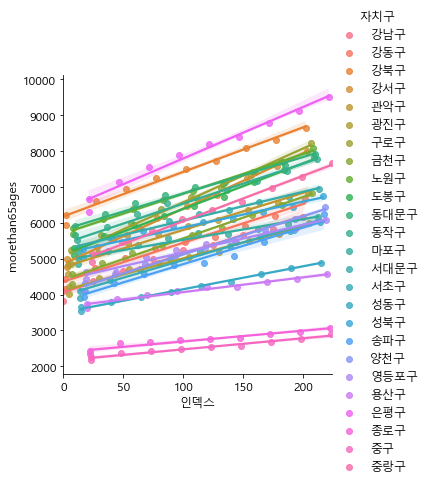

In [46]:
ax1=plt.subplots
ax1=sns.lmplot(x='인덱스',y='morethan65ages',data=result_frame, hue='자치구')

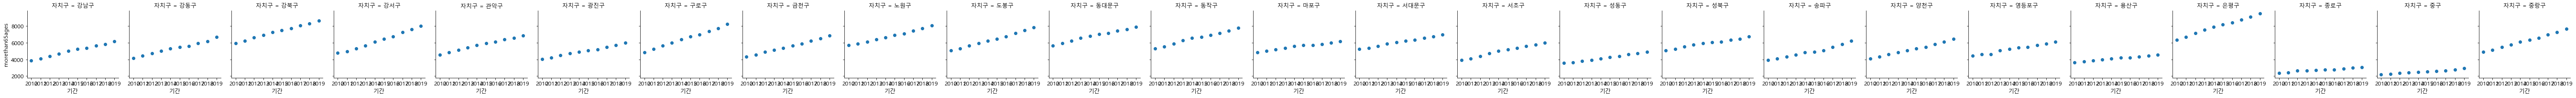

1389509.5114289247


In [47]:
facet=sns.FacetGrid(result_frame, col='자치구')
facet=facet.map(plt.scatter,'기간','morethan65ages')
plt.show()

print(result_frame['morethan65ages'].sum())
#서울시 고령화 인구 140만명 추산
#1000만인구 중 14% 정도의 고령화를 가지고 있음.

<function matplotlib.pyplot.show(*args, **kw)>

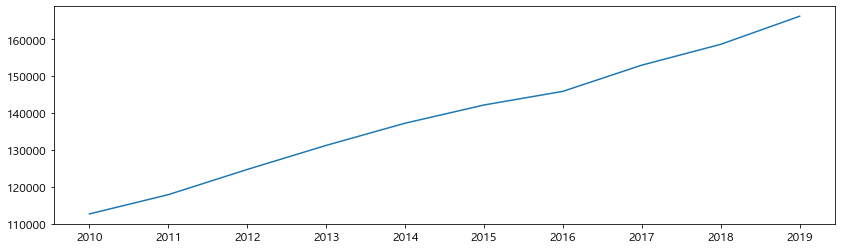

In [48]:
y=result_frame.groupby('기간').morethan65ages.sum()

plt.plot(y.index,y)
plt.show

In [49]:
result_frame.to_csv('2차분석데이터\서울시노인인구정형화데이터.csv',sep='\t')

--------------------------------------------------------------------------------------------------------------------------------------

# 65세 이상의 노인 경제 활동 지표

In [50]:
economic_old=pd.read_csv('노인경제활동인구지표.csv',sep='\t')
economic_old

,기간,구분,65세이상 인구,65세이상 경제활동인구,65세이상 비경제활동인구,65세이상 취업자수,65세이상 경제활동참가율(%),65세이상 고용률(%)
0,2010,구분,928,229,699,220,24.6,23.7
1,2011,구분,970,238,732,229,24.5,23.6
2,2012,구분,"1,028",263,765,254,25.6,24.7
3,2013,구분,"1,089",276,813,271,25.4,24.8
4,2014,구분,"1,149",318,831,310,27.7,27.0
5,2015,구분,"1,205",322,883,313,26.7,25.9
6,2016,구분,"1,241",326,915,319,26.3,25.7
7,2017,구분,"1,292",345,947,332,26.7,25.7
8,2018,구분,"1,346",356,990,343,26.5,25.4
9,2019,구분,"1,400",410,990,393,29.3,28.0


In [51]:
economic_old_drop=economic_old.drop(['구분','65세이상 비경제활동인구','65세이상 취업자수'],axis=1)
economic_old_drop

,기간,65세이상 인구,65세이상 경제활동인구,65세이상 경제활동참가율(%),65세이상 고용률(%)
0,2010,928,229,24.6,23.7
1,2011,970,238,24.5,23.6
2,2012,"1,028",263,25.6,24.7
3,2013,"1,089",276,25.4,24.8
4,2014,"1,149",318,27.7,27.0
5,2015,"1,205",322,26.7,25.9
6,2016,"1,241",326,26.3,25.7
7,2017,"1,292",345,26.7,25.7
8,2018,"1,346",356,26.5,25.4
9,2019,"1,400",410,29.3,28.0


In [52]:
economic_old_drop['65세이상 인구(명)']=economic_old_drop['65세이상 인구'].str.replace(',','').astype(int)

economic_old_tiny_drop=economic_old_drop.drop(['65세이상 인구'],axis=1)
economic_old_tiny_drop

,기간,65세이상 경제활동인구,65세이상 경제활동참가율(%),65세이상 고용률(%),65세이상 인구(명)
0,2010,229,24.6,23.7,928
1,2011,238,24.5,23.6,970
2,2012,263,25.6,24.7,1028
3,2013,276,25.4,24.8,1089
4,2014,318,27.7,27.0,1149
5,2015,322,26.7,25.9,1205
6,2016,326,26.3,25.7,1241
7,2017,345,26.7,25.7,1292
8,2018,356,26.5,25.4,1346
9,2019,410,29.3,28.0,1400


In [53]:
economic_old_tiny_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   기간                10 non-null     int64  
 1   65세이상 경제활동인구      10 non-null     int64  
 2   65세이상 경제활동참가율(%)  10 non-null     float64
 3   65세이상 고용률(%)      10 non-null     float64
 4   65세이상 인구(명)       10 non-null     int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 488.0 bytes


In [54]:
economic_old_tiny_drop.iloc[:,1:5:3]*1000

,65세이상 경제활동인구,65세이상 인구(명)
0,229000,928000
1,238000,970000
2,263000,1028000
3,276000,1089000
4,318000,1149000
5,322000,1205000
6,326000,1241000
7,345000,1292000
8,356000,1346000
9,410000,1400000


# 저출산 통계율

In [55]:
child_low=pd.read_csv('출산연령에따른아이명.csv',sep='\t')
child_low

,기간,연령,총계,총계.1,총계.2,1아,1아.1,1아.2,2아,2아.1,...,6아.2,7아,7아.1,7아.2,8아이상,8아이상.1,8아이상.2,미상,미상.1,미상.2
0,기간,연령,계,남자,여자,계,남자,여자,계,남자,...,여자,계,남자,여자,계,여자,남자,계,남자,여자
1,2011,계,"91,526","46,853","44,673","51,396","26,227","25,169","32,895","16,829",...,10,9,5,4,3,3,-,231,129,102
2,2011,15세 미만,3,2,1,2,1,1,-,-,...,-,-,-,-,-,-,-,1,1,-
3,2011,15~19세,302,155,147,263,131,132,11,5,...,-,-,-,-,-,-,-,28,19,9
4,2011,20~24세,"2,739","1,412","1,327","2,200","1,135","1,065",472,237,...,-,-,-,-,-,-,-,25,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2019,35~39세,"17,956","9,269","8,687","9,071","4,664","4,407","7,351","3,824",...,1,-,-,-,-,-,-,2,1,1
93,2019,40~44세,"2,708","1,419","1,289","1,376",712,664,954,505,...,1,1,-,1,-,-,-,-,-,-
94,2019,45~49세,67,33,34,35,19,16,19,7,...,-,-,-,-,-,-,-,-,-,-
95,2019,50세 이상,7,4,3,5,3,2,1,1,...,-,-,-,-,-,-,-,-,-,-


In [56]:
child_low_drop=child_low.drop(child_low.columns[5:],axis=1)
child_low_drop

,기간,연령,총계,총계.1,총계.2
0,기간,연령,계,남자,여자
1,2011,계,"91,526","46,853","44,673"
2,2011,15세 미만,3,2,1
3,2011,15~19세,302,155,147
4,2011,20~24세,"2,739","1,412","1,327"
...,...,...,...,...,...
92,2019,35~39세,"17,956","9,269","8,687"
93,2019,40~44세,"2,708","1,419","1,289"
94,2019,45~49세,67,33,34
95,2019,50세 이상,7,4,3


In [57]:
child_low_sum=child_low_drop[child_low_drop['연령']=='계'].reset_index()
child_low_sum

,index,기간,연령,총계,총계.1,총계.2
0,1,2011,계,"91,526","46,853","44,673"
1,12,2012,계,"93,914","48,353","45,561"
2,23,2013,계,"84,066","43,181","40,885"
3,34,2014,계,"83,711","42,899","40,812"
4,44,2015,계,"83,005","42,370","40,635"
5,55,2016,계,"75,536","38,744","36,792"
6,66,2017,계,"65,389","33,485","31,904"
7,76,2018,계,"58,074","30,137","27,937"
8,86,2019,계,"53,673","27,811","25,862"


In [58]:
child_low_sum['총합(명)'],child_low_sum['남자(명)'],child_low_sum['여자(명)']=child_low_sum['총계'].str.replace(',','').astype(int),child_low_sum['총계.1'].str.replace(',','').astype(int),child_low_sum['총계.2'].str.replace(',','').astype(int)


In [59]:
child_low_sum

,index,기간,연령,총계,총계.1,총계.2,총합(명),남자(명),여자(명)
0,1,2011,계,"91,526","46,853","44,673",91526,46853,44673
1,12,2012,계,"93,914","48,353","45,561",93914,48353,45561
2,23,2013,계,"84,066","43,181","40,885",84066,43181,40885
3,34,2014,계,"83,711","42,899","40,812",83711,42899,40812
4,44,2015,계,"83,005","42,370","40,635",83005,42370,40635
5,55,2016,계,"75,536","38,744","36,792",75536,38744,36792
6,66,2017,계,"65,389","33,485","31,904",65389,33485,31904
7,76,2018,계,"58,074","30,137","27,937",58074,30137,27937
8,86,2019,계,"53,673","27,811","25,862",53673,27811,25862


In [60]:
child_low_sum_drop=child_low_sum.drop(child_low_sum.columns[2:6],axis=1)
child_low_sum_drop

,index,기간,총합(명),남자(명),여자(명)
0,1,2011,91526,46853,44673
1,12,2012,93914,48353,45561
2,23,2013,84066,43181,40885
3,34,2014,83711,42899,40812
4,44,2015,83005,42370,40635
5,55,2016,75536,38744,36792
6,66,2017,65389,33485,31904
7,76,2018,58074,30137,27937
8,86,2019,53673,27811,25862


In [61]:
child_low_year=child_low_sum_drop['기간'].astype(int)
child_low_sum_drop['year']=child_low_year
child_low_result_df=child_low_sum_drop.drop(['기간','index'],axis=1)
child_low_result_df

,총합(명),남자(명),여자(명),year
0,91526,46853,44673,2011
1,93914,48353,45561,2012
2,84066,43181,40885,2013
3,83711,42899,40812,2014
4,83005,42370,40635,2015
5,75536,38744,36792,2016
6,65389,33485,31904,2017
7,58074,30137,27937,2018
8,53673,27811,25862,2019


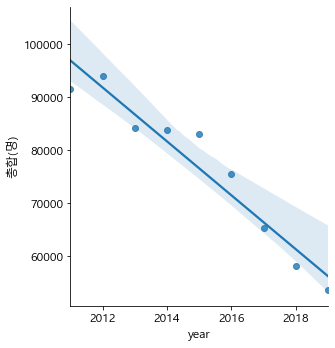

In [62]:
ax2=plt.subplots
ax2=sns.lmplot(x='year',y='총합(명)',data=child_low_result_df,fit_reg=True)

In [63]:
child_low_result_df.to_csv('2차분석데이터\저출산현황정형화그래프.csv',sep='\t')